# Day 2 – ML Pipeline & Data Preparation (California Housing, NumPy Scaling)

In this notebook we will:
1. Load the **California Housing** dataset.
2. Explore the features and target variable.
3. Split the data into an **80/20 Train–Test** split.
4. Perform a quick **Exploratory Data Analysis (EDA)**.
5. Apply **Min–Max Normalization** to [0,1] **using only NumPy**.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

## Step 1 – Load the California Housing dataset
Each row describes a California district and the target
(`MedHouseVal`) is the median house value (in $100,000s).


In [3]:
housing=fetch_california_housing(as_frame=True)
X=housing.data
y=housing.target

print("shape of x : ", X.shape)
print("Shape ofn y:", y.shape)


shape of x :  (20640, 8)
Shape ofn y: (20640,)


In [4]:
cols = ['MedInc', 'AveRooms', 'HouseAge']

X=X[cols]
X

,MedInc,AveRooms,HouseAge
0,8.3252,6.984127,41.0
1,8.3014,6.238137,21.0
2,7.2574,8.288136,52.0
3,5.6431,5.817352,52.0
4,3.8462,6.281853,52.0
...,...,...,...
20635,1.5603,5.045455,25.0
20636,2.5568,6.114035,18.0
20637,1.7000,5.205543,17.0
20638,1.8672,5.329513,18.0


## Step 2 – Train / Test Split (80/20)
We'll keep **20%** of the data for testing and use the remaining
**80%** for training.


In [5]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (16512, 3)
X_test shape: (4128, 3)


In [17]:
y_train.iloc[0]

np.float64(1.03)

## Step 3 – Quick Exploratory Data Analysis (EDA)
Before preprocessing, let's inspect some summary statistics
and check correlations of each feature with the target.


In [7]:
X_train.describe()

,MedInc,AveRooms,HouseAge
count,16512.000000,16512.000000,16512.000000
mean,3.880754,5.435235,28.608285
std,1.904294,2.387375,12.602499
min,0.499900,0.888889,1.000000
25%,2.566700,4.452055,18.000000
50%,3.545800,5.235874,29.000000
75%,4.773175,6.061037,37.000000
max,15.000100,141.909091,52.000000


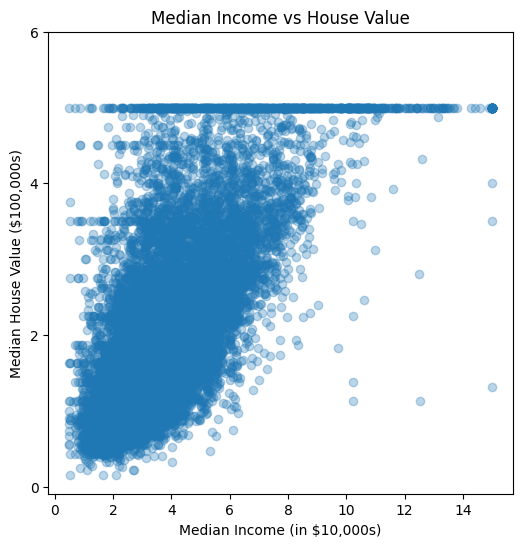

In [8]:
# Visualize the strongest relationship: Median Income vs House Value
plt.figure(figsize=(6,6))
plt.scatter(X_train["MedInc"], y_train, alpha=0.3)
plt.xlabel("Median Income (in $10,000s)")
plt.ylabel("Median House Value ($100,000s)")
plt.title("Median Income vs House Value")
plt.yticks([0, 2,4,6])
plt.show()


## Step 4 – Min–Max Normalization with NumPy
We scale each feature to the range **[0,1]** using:

\[
X_{scaled} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
\]

We compute the **min** and **max** only from the **training set**
to avoid data leakage, then apply the same transformation to both
train and test sets.


In [9]:
# Convert pandas DataFrame to NumPy arrays for manual scaling
X_train_np = X_train.to_numpy()
X_test_np  = X_test.to_numpy()

# Compute per-column min and max on training data
X_min = X_train_np.min(axis=0)
X_max = X_train_np.max(axis=0)

# Avoid division by zero if a column is constant
scale_range = np.where(X_max - X_min == 0, 1, X_max - X_min)

# Apply scaling
X_train_scaled = (X_train_np - X_min) / scale_range
X_test_scaled  = (X_test_np  - X_min) / scale_range


In [10]:
import pandas as pd

# Convert back to DataFrame with same columns & index
X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 columns=X_train.columns,
                                 index=X_train.index)

X_test_scaled_df = pd.DataFrame(X_test_scaled,
                                columns=X_test.columns,
                                index=X_test.index)

# Print a preview of the scaled training data
print("Scaled Training Data (first 5 rows):\n")
print(X_train_scaled_df.head())

# Optional: check the full shape
print("\nShape:", X_train_scaled_df.shape)


Scaled Training Data (first 5 rows):

         MedInc  AveRooms  HouseAge
14196  0.190322  0.029278  0.627451
8267   0.228452  0.025419  0.941176
17445  0.252162  0.033732  0.058824
14265  0.099488  0.022081  0.686275
2271   0.210638  0.038147  0.823529

Shape: (16512, 3)
